In [1]:
import pandas as pd
import numpy as np
import pickle

### Regression Tree

A regression tree is built through a process known as binary recursive partitioning, which is an iterative process that splits the data into partitions or branches, and then continues splitting each partition into smaller groups as the method moves up each branch.

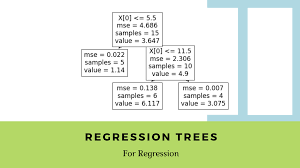

In [2]:
with open('diabetes.txt','rb') as f:
    data = pickle.load(f)
X = data['data']
y = data['target']
df_data = pd.DataFrame(X, columns=data['feature_names'])
df_data['y'] = y
df_data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,y
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


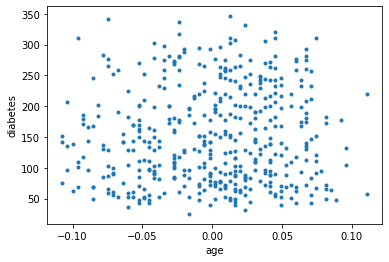

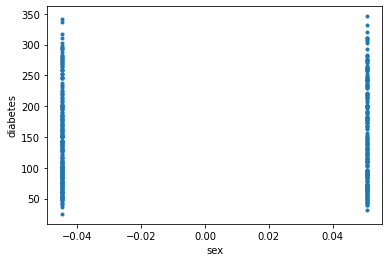

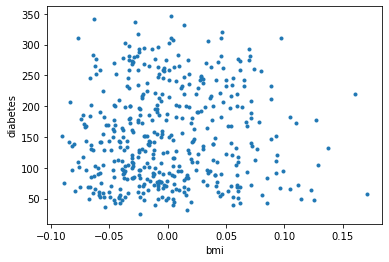

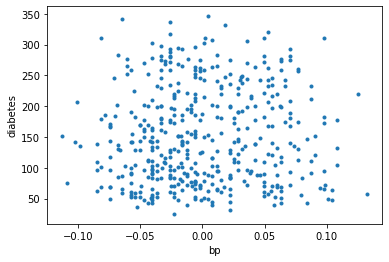

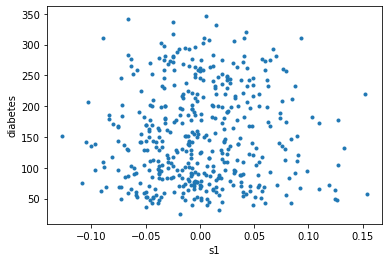

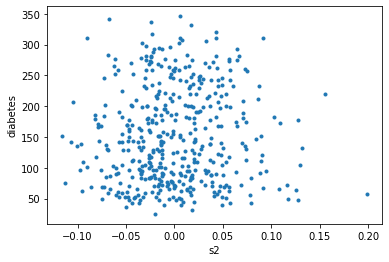

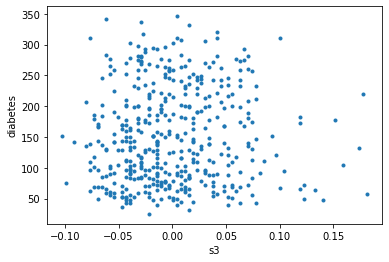

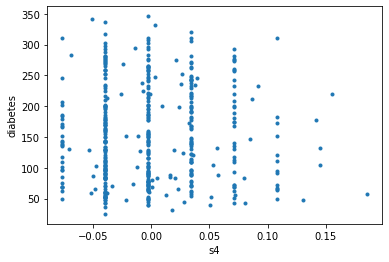

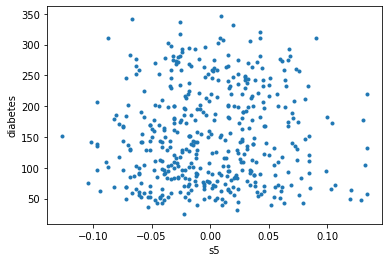

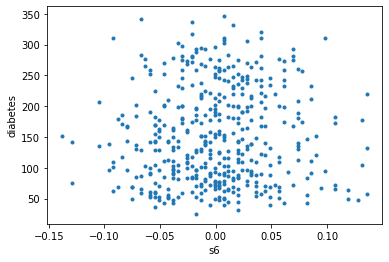

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,y
406,-0.056370,-0.044642,-0.080575,-0.084857,-0.037344,-0.037013,0.033914,-0.039493,-0.056158,-0.137767,72.0
245,-0.027310,-0.044642,-0.035307,-0.029771,-0.056607,-0.058620,0.030232,-0.039493,-0.049868,-0.129483,125.0
84,0.001751,-0.044642,-0.039618,-0.100923,-0.029088,-0.030124,0.044958,-0.050195,-0.068330,-0.129483,65.0
166,-0.056370,0.050680,-0.060097,-0.036656,-0.088254,-0.070833,-0.013948,-0.039493,-0.078141,-0.104630,70.0
187,-0.067268,-0.044642,-0.054707,-0.026328,-0.075870,-0.082106,0.048640,-0.076395,-0.086829,-0.104630,143.0
...,...,...,...,...,...,...,...,...,...,...,...
428,0.048974,0.050680,0.088642,0.087287,0.035582,0.021546,-0.024993,0.034309,0.066048,0.131470,310.0
141,-0.027310,-0.044642,0.047685,-0.046985,0.034206,0.057245,-0.080217,0.130252,0.045066,0.131470,317.0
350,-0.027310,0.050680,0.060618,0.107944,0.012191,-0.017598,-0.002903,-0.002592,0.070211,0.135612,243.0
117,0.059871,-0.044642,-0.021295,0.087287,0.045213,0.031567,-0.047082,0.071210,0.079121,0.135612,281.0


In [12]:
import matplotlib.pyplot as plt
for feture_name in data['feature_names']:
    plt.plot(df_data[feture_name],y,'.')
    plt.xlabel(feture_name)
    plt.ylabel('diabetes')
    plt.show()

In [4]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np

class myRegressionTree:
    def __init__(self):
        '''
        buildmodel
        '''
        self.clf = make_pipeline(
            StandardScaler(),
            DecisionTreeRegressor()
        )

    def train(self, X, y):
        '''
        train
        :param X:
        :param y:
        :return:
        '''
        self.clf = self.clf.fit(X, y)
        return self.clf

    def predict(self, X):
        '''
        predict
        :param X:
        :return:
        '''
        return self.clf.predict(X)

In [5]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
def eval_result(y, pre_y):
    '''
    :param y:
    :param pre_y:
    :return:
    '''
    rmse = mean_squared_error(y, pre_y, squared=False)
    mae = mean_absolute_error(y,pre_y)
    return {'rmse':rmse,
            'mae':mae}

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=1)

In [7]:
model = myRegressionTree()
model.train(X_train,y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [8]:
pre_y_train = model.predict(X_train)
eval_train = eval_result(y_train, pre_y_train)
print('eval_train\n', eval_train)

eval_train
 {'rmse': 0.0, 'mae': 0.0}


In [9]:
pre_y_test = model.predict(X_test)
eval_test = eval_result(y_test, pre_y_test)
print('eval_test\n',eval_test)

eval_test
 {'rmse': 80.65107256334522, 'mae': 62.91011235955056}


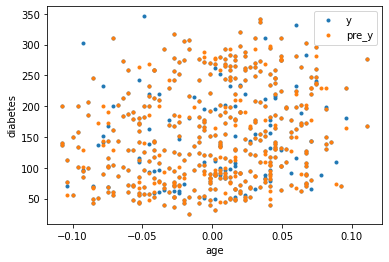

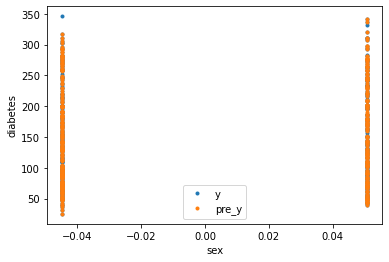

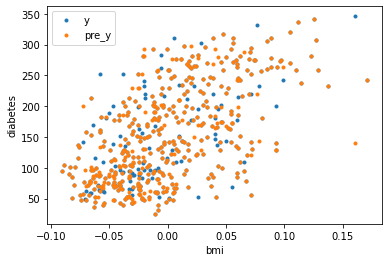

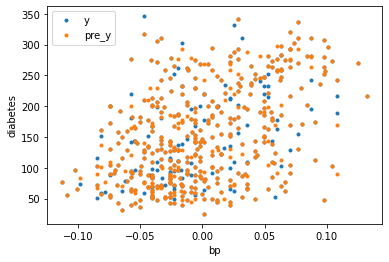

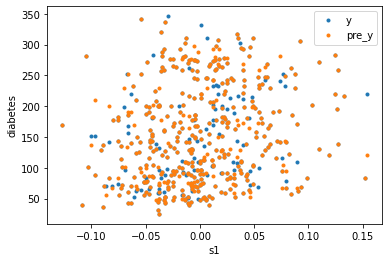

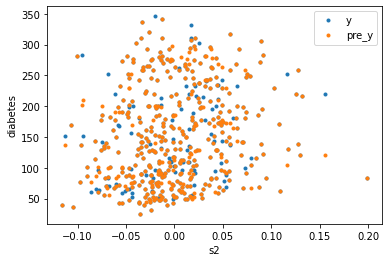

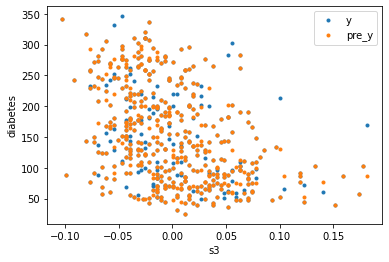

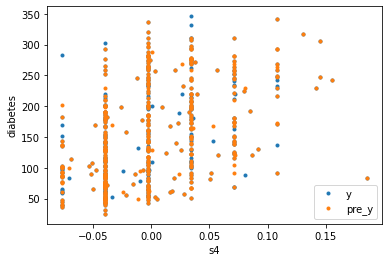

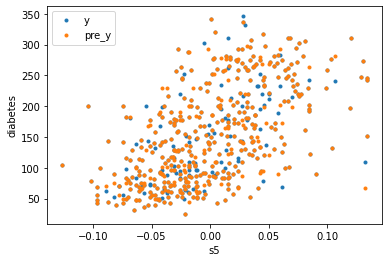

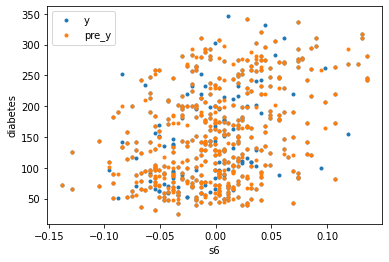

In [10]:
pre_y = model.predict(X)
import matplotlib.pyplot as plt
for feture_name in data['feature_names']:
    plt.plot(df_data[feture_name],y,'.')
    plt.plot(df_data[feture_name],pre_y,'.')
    plt.legend(['y','pre_y'])
    plt.xlabel(feture_name)
    plt.ylabel('diabetes')
    plt.show()

### Decision Trees  

A decision tree is a decision support tool that uses a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility.

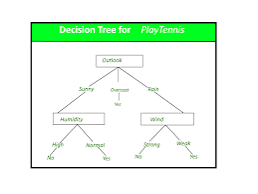

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
with open('diabetes.txt','rb') as f:
    data = pickle.load(f)
X = data['data']
y = data['target']
df_data = pd.DataFrame(X, columns=data['feature_names'])
df_data['y'] = y
df_data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,y
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
encoder = ce.OrdinalEncoder(cols=['age', 'sex', 'bmi', 'bp ', 's1', 's2','s3','s4','s5','s6'])
X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

NameError: name 'ce' is not defined